<a href="https://colab.research.google.com/github/jamesBaker361/colab/blob/master/April27.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from matplotlib import pyplot as plt

import torch
from torch.distributions.normal import Normal

from google.colab import files
files.upload()
import shu_pytorch_shutil as shutil

Saving shu_pytorch_shutil.py to shu_pytorch_shutil (2).py


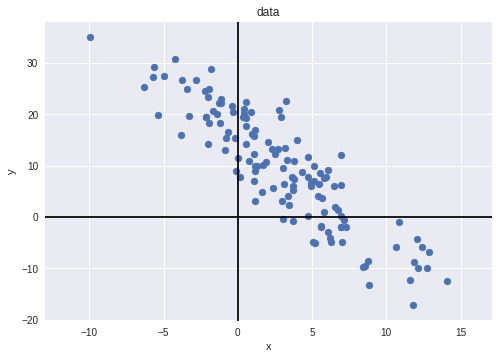

In [0]:
xs = Normal(3,5).sample((128,))
ys=-2*xs+15+Normal(0,5).sample(xs.shape)
data=(xs,ys)
shutil.show_data(xs,ys)

In [0]:
def batch(data,bs=16):
  xs,ys=data
  perm=torch.randperm(len(xs))
  xs=xs[perm].view(-1,bs)
  ys=ys[perm].view(-1,bs)
  return(zip(xs,ys))

In [0]:
stuff=list(batch(data))
stuff[0]

(tensor([-1.9924,  3.0104, 11.7771,  1.1234,  8.4444, -4.9721,  5.6185, -5.6513,
          0.9009, -3.3160, -3.4211,  6.1024,  1.1185, 11.8738,  5.9435, -2.1417]),
 tensor([ 23.3559,   9.5733, -17.1871,   8.9674,  -9.6355,  27.4966,  -1.9236,
          29.1692,  20.3890,  19.6497,  24.8790,   9.1650,  15.6949,  -8.7691,
           7.7443,  19.4304]))

In [0]:
w=torch.tensor(3.0,requires_grad=True)
b=torch.tensor(7.0,requires_grad=True)
def m(x,w=w,b=b):
  return((w*x)+b)

In [0]:
loss=lambda y_hat,y: torch.mean(.5*(y_hat-y)**2)

In [0]:
loss(torch.tensor(5.0),torch.tensor(30))

tensor(312.5000)

In [0]:
alpha=.01
def update():
  global w,b,alpha
  with torch.no_grad():
    w-= alpha * w.grad
    b-=alpha *b.grad
    w.grad.zero_()
    b.grad.zero_()
    return
#update()

In [0]:
losses=[]
epoch=0
for _ in range(10):
  for x,y in batch(data):
    yh=m(x)
    l=loss(yh,y)
    l.backward()
    update()
    losses.append(l.item())
  print(f'epoch: {epoch} {losses[-1]}')
  epoch+=1

epoch: 0 27.296655654907227
epoch: 1 27.678144454956055
epoch: 2 23.034460067749023
epoch: 3 30.726512908935547
epoch: 4 24.405223846435547
epoch: 5 27.352285385131836
epoch: 6 22.738216400146484
epoch: 7 31.002622604370117
epoch: 8 17.270339965820312
epoch: 9 19.044536590576172


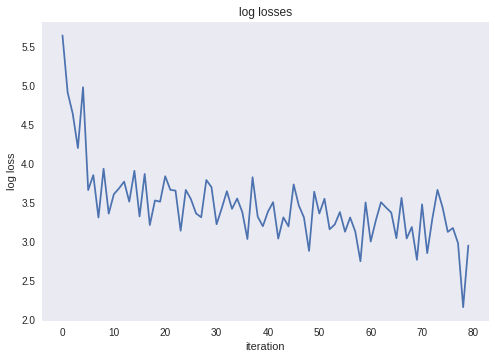

In [0]:
shutil.show_losses(losses)

In [0]:
b

tensor(10.5660, requires_grad=True)

In [0]:
w

tensor(-1.5522, requires_grad=True)

In [0]:
#data

In [0]:
from torch import nn
from torch.utils.data import Dataset, DataLoader

class RegressionDataset(Dataset):
  def __init__(self,n,w,b,ux,sx,uy,sy):
    self.n=n
    self.w=w
    self.b=b
    self.xs=Normal(ux,sx).sample((n,))
    self.ys=w*self.xs+b+Normal(uy,sy).sample((n,))
    return
  def __len__(self):
    return(self.n)
  def __getitem(self,idx):
    return self.xs[idk],self.ys[idk]
data=RegressionDataset(128,-2,15,3,5,0,5)  

In [0]:
loader=DataLoader(data,batch_size=16,shuffle=True)

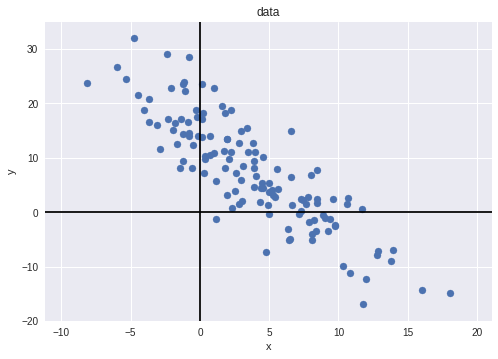

In [0]:
shutil.show_data(data.xs,data.ys)

In [0]:
#batcher

In [0]:
#f_theta
class RegressionModel(nn.Module):
  def __init__(self):
    super(RegressionModel,self).__init__()
    self.w=nn.Parameter(torch.tensor(3.0))
    self.b=nn.Parameter(torch.tensor(7.0))
  def forward(self,x):
    return self.w*x+self.b
  
m=RegressionModel()

In [0]:
#L(y_hat,y)
loss=nn.MSELoss()

In [0]:
#update
opt=torch.optim.SGD(m.parameters(),lr=.02)

In [0]:
#train loop

In [0]:
epoch=0
losses=[]

In [0]:
for _ in range(10):
  for x,y in loader:
    opt.zero_grad()
    y_hat=m(x)
    l=loss(y_hat,y)
    opt.step()
    losses.append(l.item())
    
  print(f'epoch {epoch}: {losses[-1]}')
  epoch+=1

NotImplementedError: ignored